## 뉴스 기사 분류 - 다중 분류 연습문제
- 로이터 뉴스 기사 분류
- 46개의 주제로 이루어진 뉴스 기사 분류
- keras.datasets의 reuters 데이터 
  - from keras.datasets import reuters
  - reuters.load_data()
- (1) 데이터 준비 
- (2) 모델링 
  - 3개의 Dense 층 (유닛수 : 64, 64, 46)
- (3) 시각화 
- (4) 재학습 / 시각화
- (5) 예측 

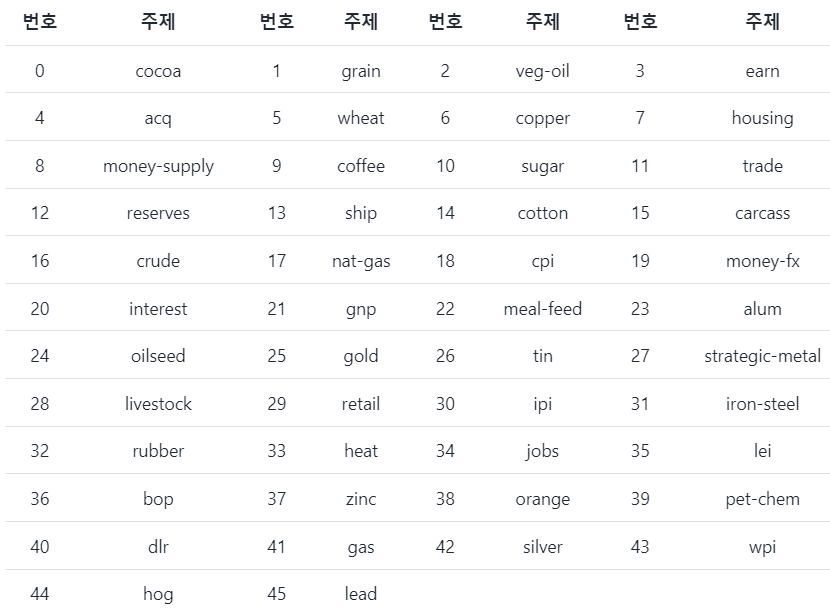

In [ ]:
# 레이블 값을 멀티-핫 인코딩 수행한 결과
# y_train = to_categorical(train_labels)
# y_test = to_categorical(test_labels)
# -> compile(loss='categorical_crossentropy') 지정

In [17]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [22]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [23]:
train_data.shape
train_labels.shape
test_data.shape
test_labels.shape

(8982,)

(8982,)

(2246,)

(2246,)

In [5]:
train_labels[:20]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16,  3,  3,  4,  4, 19,  8, 16,
        3,  3, 21], dtype=int64)

In [17]:
max(max(train_data))
max(max(test_data))

9975

9931

In [20]:
import numpy as np

# train_data와 test_data 멀티-핫 인코딩 : 백터로 변환
# 인덱스에 해당되는 위치는 1, 나머지는 0으로 채움
def vectorize_sequence(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬
    results = np.zeros((len(sequences), dimension)) # 0으로 채움 (초기화)
    
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1 # 특정 인덱스의 위치는 1로 설정
    
    return results

# 훈련 데이터를 벡터로 변환
X_train = vectorize_sequence(train_data).astype('float32')
X_test = vectorize_sequence(test_data).astype('float32')

In [21]:
train_data.shape
X_train.shape
X_test.shape

(8982,)

(8982, 10000)

(2246, 10000)

In [ ]:
# 레이블을 데이터셋 변환
# y_train = train_labels.astype('float32')
# y_test = test_labels.astype('float32')

In [14]:
# 46개의 카테고리가 있으므로 인코딩 해주기
from keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [24]:
X_val = X_train[:2500] 
partial_X_train = X_train[2500:] 

y_val =  y_train[:2500] 
partial_y_train =  y_train[2500:] 

In [25]:
X_val.shape
partial_X_train.shape
y_val.shape
partial_y_train.shape

(2500, 10000)

(6482, 10000)

(2500, 46)

(6482, 46)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

tf.random.set_seed(3)

# (1) 모델 설정

model = Sequential()
model.add(Dense(64, input_shape=(10000,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

# (2) 모델 컴파일

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])


# (3) 모델 학습

epochs = 20
batch_size = 512
history = model.fit(partial_X_train, partial_y_train, 
                    epochs=epochs, batch_size=batch_size,
                    validation_data=(X_val, y_val))

# (4) 모델 평가 (결과 출력) : accuracy, loss
loss, accuracy = model.evaluate(X_test, y_test)
print(f'정확도: {accuracy:.4f}, 손실: {loss:.4f}')

Epoch 1/20
13/13 [==============================] - 1s 26ms/step - loss: 3.4550 - accuracy: 0.4560 - val_loss: 2.8770 - val_accuracy: 0.5668
Epoch 2/20
13/13 [==============================] - 0s 15ms/step - loss: 2.2889 - accuracy: 0.6137 - val_loss: 1.8939 - val_accuracy: 0.6208
Epoch 3/20
13/13 [==============================] - 0s 13ms/step - loss: 1.5032 - accuracy: 0.6961 - val_loss: 1.4997 - val_accuracy: 0.6740
Epoch 4/20
13/13 [==============================] - 0s 13ms/step - loss: 1.1712 - accuracy: 0.7438 - val_loss: 1.3228 - val_accuracy: 0.7108
Epoch 5/20
13/13 [==============================] - 0s 13ms/step - loss: 0.9602 - accuracy: 0.7896 - val_loss: 1.2199 - val_accuracy: 0.7324
Epoch 6/20
13/13 [==============================] - 0s 13ms/step - loss: 0.7925 - accuracy: 0.8244 - val_loss: 1.1426 - val_accuracy: 0.7468
Epoch 7/20
13/13 [==============================] - 0s 14ms/step - loss: 0.6506 - accuracy: 0.8601 - val_loss: 1.0885 - val_accuracy: 0.7632
Epoch 8/20
13

<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'accuracy')

<Axes: >

Text(0.5, 1.0, 'loss')

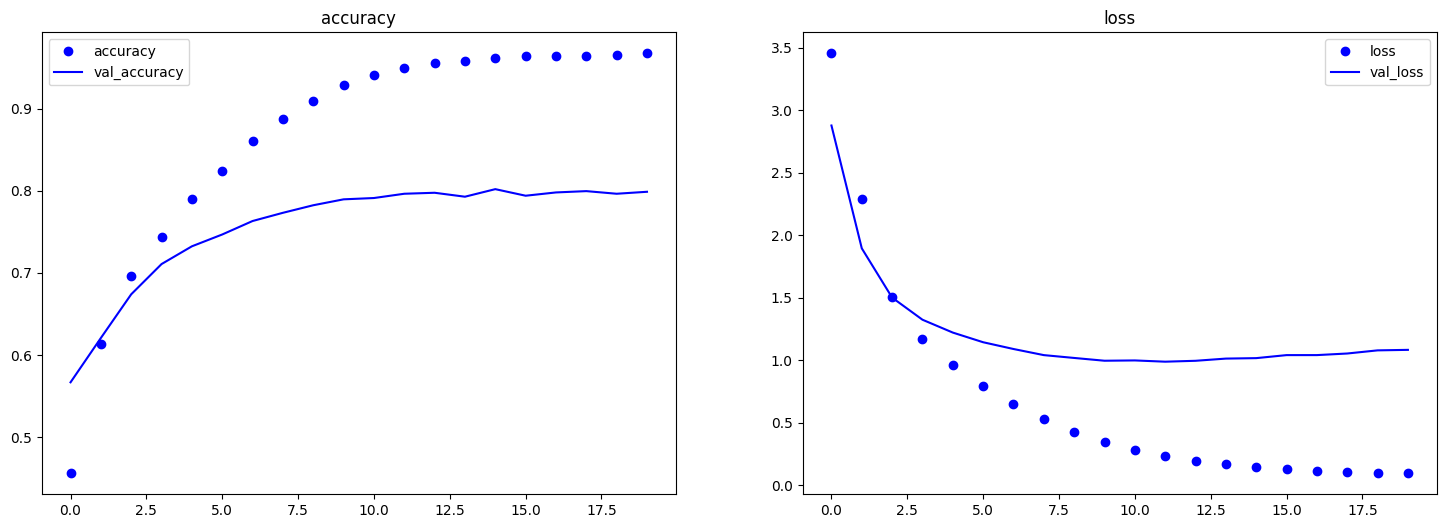

In [27]:
# 시각화
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(18, 6))

# 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'bo',label='accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='val_accuracy')
plt.title('accuracy')
plt.legend()

# 손실률
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'bo', label='loss')
plt.plot(history.history['val_loss'], 'b', label='val_loss')
plt.title('loss')
plt.legend()

plt.show()

### 재학습
- val_loss가 감속하다가 10번 에포크부터 증가하기 시작
- epochs = 10로 해서 재학습

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

tf.random.set_seed(3)

# (1) 모델 설정

model = Sequential()
model.add(Dense(64, input_shape=(10000,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

# (2) 모델 컴파일

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])


# (3) 모델 학습

epochs = 10
batch_size = 512
history = model.fit(partial_X_train, partial_y_train, 
                    epochs=epochs, batch_size=batch_size,
                    validation_data=(X_val, y_val))

# (4) 모델 평가 (결과 출력) : accuracy, loss
loss, accuracy = model.evaluate(X_test, y_test)
print(f'정확도: {accuracy:.4f}, 손실: {loss:.4f}')

Epoch 1/10
13/13 [==============================] - 1s 28ms/step - loss: 3.4483 - accuracy: 0.3476 - val_loss: 2.9062 - val_accuracy: 0.4684
Epoch 2/10
13/13 [==============================] - 0s 15ms/step - loss: 2.3888 - accuracy: 0.5724 - val_loss: 1.9888 - val_accuracy: 0.6164
Epoch 3/10
13/13 [==============================] - 0s 14ms/step - loss: 1.5834 - accuracy: 0.6830 - val_loss: 1.5295 - val_accuracy: 0.6784
Epoch 4/10
13/13 [==============================] - 0s 14ms/step - loss: 1.1773 - accuracy: 0.7536 - val_loss: 1.3209 - val_accuracy: 0.7132
Epoch 5/10
13/13 [==============================] - 0s 14ms/step - loss: 0.9324 - accuracy: 0.8028 - val_loss: 1.2015 - val_accuracy: 0.7484
Epoch 6/10
13/13 [==============================] - 0s 13ms/step - loss: 0.7515 - accuracy: 0.8416 - val_loss: 1.1219 - val_accuracy: 0.7624
Epoch 7/10
13/13 [==============================] - 0s 14ms/step - loss: 0.6076 - accuracy: 0.8769 - val_loss: 1.0670 - val_accuracy: 0.7732
Epoch 8/10
13

<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'accuracy')

<Axes: >

Text(0.5, 1.0, 'loss')

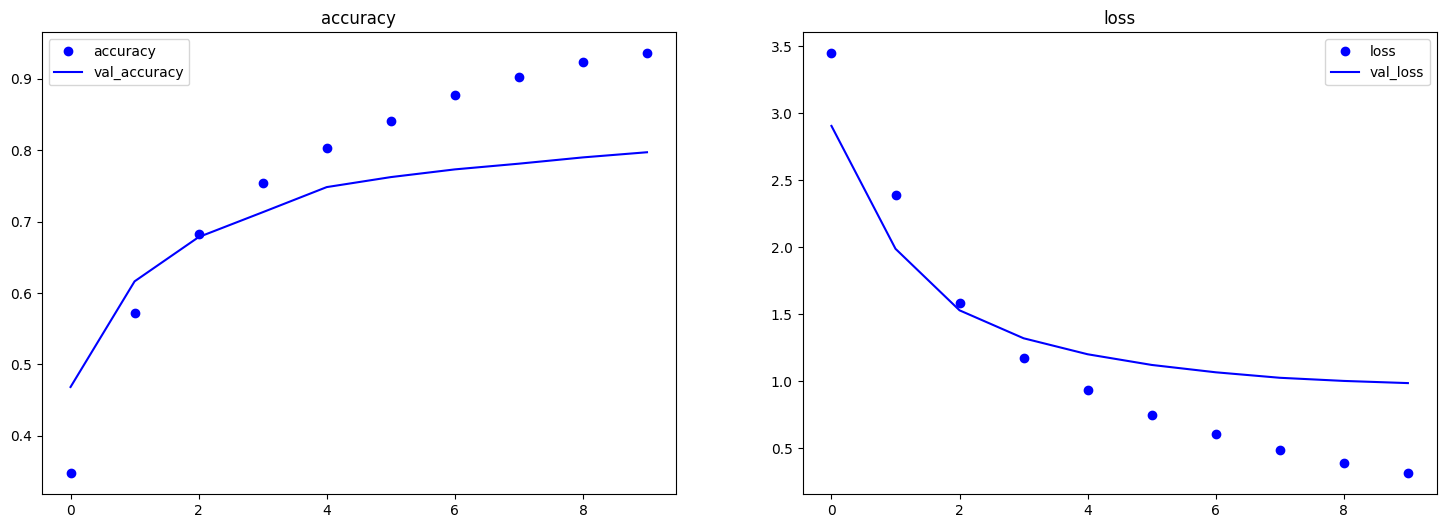

In [30]:
# 시각화
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(18, 6))

# 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'bo',label='accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='val_accuracy')
plt.title('accuracy')
plt.legend()

# 손실률
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'bo', label='loss')
plt.plot(history.history['val_loss'], 'b', label='val_loss')
plt.title('loss')
plt.legend()

plt.show()

In [20]:
test_labels

array([ 3, 10,  1, ...,  3,  3, 24], dtype=int64)

In [32]:
#예측
y_pre_prob = model.predict(X_test, verbose=0)
y_pred = y_pre_prob.argmax(axis=1) 

for i in range(20):    
    print(f'예측 값 :{y_pred[i]}, 실제 값 :{test_labels[i]}')


예측 값 :3, 실제 값 :3
예측 값 :10, 실제 값 :10
예측 값 :1, 실제 값 :1
예측 값 :4, 실제 값 :4
예측 값 :13, 실제 값 :4
예측 값 :3, 실제 값 :3
예측 값 :3, 실제 값 :3
예측 값 :3, 실제 값 :3
예측 값 :3, 실제 값 :3
예측 값 :3, 실제 값 :3
예측 값 :1, 실제 값 :5
예측 값 :4, 실제 값 :4
예측 값 :1, 실제 값 :1
예측 값 :3, 실제 값 :3
예측 값 :13, 실제 값 :1
예측 값 :11, 실제 값 :11
예측 값 :4, 실제 값 :23
예측 값 :3, 실제 값 :3
예측 값 :19, 실제 값 :19
예측 값 :3, 실제 값 :3
